In this project we will build a model to predict the electrical energy output of a
Combined Cycle Power Plant
, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power.  We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.

The columns in the data consist of hourly average ambient variables:
- Temperature (T) in the range 1.81°C to 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv('/content/drive/MyDrive/CCPP_data.csv')
print(data.head())
print(data.describe())

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


In [12]:
X = data[['AT', 'AP', 'RH', 'V']]
y = data['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model 1: Linear Regression

In [13]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

Model 2: Random Forest

In [14]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

Choosing the best model (lower MAE)

In [15]:
linear_mae = mean_absolute_error(y_test, y_pred_linear)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print(f"Mean Absolute Error - Linear Regression: {linear_mae}")
print(f"Mean Absolute Error - Random Forest: {rf_mae}")

if linear_mae < rf_mae:
    print("Linear Regression is the best model.")
    best_model = linear_model
else:
    print("Random Forest is the best model.")
    best_model = random_forest_model

Mean Absolute Error - Linear Regression: 3.595913178273408
Mean Absolute Error - Random Forest: 2.3277773249738707
Random Forest is the best model.


Evaluating the best model with Mean Squared Error (MSE)

In [16]:
y_pred_best = best_model.predict(X_test_scaled if best_model == linear_model else X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"Mean Squared Error of the best model: {mse_best}")

Mean Squared Error of the best model: 10.520886302664499


Visualizing the predictions of the best model

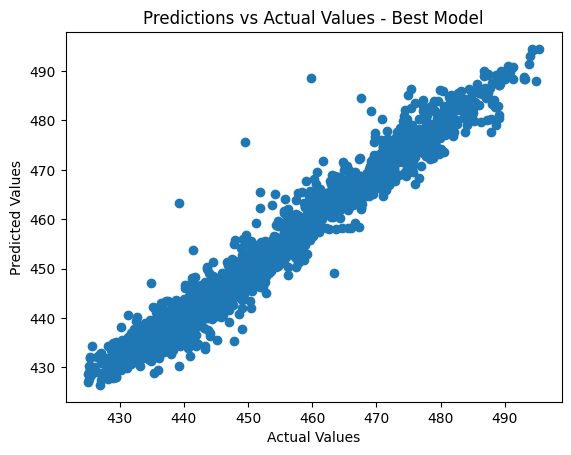

In [17]:
plt.scatter(y_test, y_pred_best)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predictions vs Actual Values - Best Model')
plt.show()